<a href="https://colab.research.google.com/github/booorayan/BluecarsAuto/blob/master/Autolib_projecte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing Project

## Defining the Question 

### Hypothesis

### Context

### Metrics for Success

### Experimental Design

### Appropriateness of Data Provided

## Importing libraries to be used

In [0]:
# pandas allows us to organize data in table form
import pandas as pd

# nummpy will enable us to work with multidimensional arrays
import numpy as np

# matplotlib will help in visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline  

# seaborn will also help in data visualization
import seaborn as sns
sns.set()  #(Re)set the seaborn default

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pp


## Loading and previewing the dataset

In [80]:
# loading the dataset and previewing the first 5 observations 
url = 'http://bit.ly/DSCoreAutolibDataset'

autoe = pd.read_csv(url)
autoe.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [81]:
# reading the columns of the dataframe
autoe.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [82]:
# loading the dictionary and reading the description of columns in the dataset
dlink = 'http://bit.ly/DSCoreAutolibDatasetGlossary'

dic = pd.read_excel(dlink)
dic


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [83]:
# checking the number of rows and columns in the dataframe
print('No. of rows: {} \nNo. of columns: {}'.format(autoe.shape[0], autoe.shape[1]))

# checking the no. of total observations
print('Total observations: {}'.format(autoe.size))

# autoe dataframe has 16,085 rows and 13 columns
# dataframe has a total of 209,105 observations


No. of rows: 16085 
No. of columns: 13
Total observations: 209105


In [84]:
# checking the datatype of the columns 
autoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Data Cleaning

In [0]:
# creating a copy of the dataframe to work on
autoel = autoe.copy()

In [86]:
# replacing whitespaces in the columns with underscores and converting column names to lowercase to ensure uniformity
autoel.columns = autoel.columns.str.replace(' ', '_').str.lower()

# confirming 
autoel.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [87]:
# checking for sum of duplicate values
autoel.duplicated().sum()

# dataframe/dataset has no duplicate values

0

In [88]:
# checking for the sum of missing values in each column

autoel.isnull().sum()

# dataframe has no missing values 

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [89]:
# converting date column to datetime
autoel.date = pd.to_datetime(autoel.date)

autoel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null datetime64[ns]
n_daily_data_points       16085 non-null int64
dayofweek                 16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 1.6+ MB


In [90]:
autoel.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


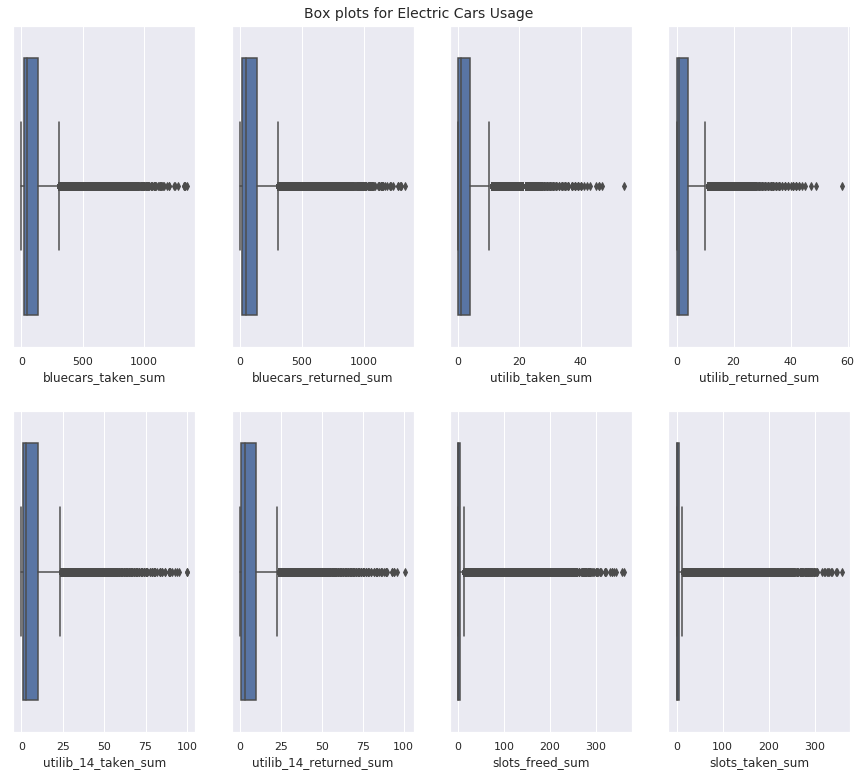

In [105]:
# checking for outliers in columns[5:]

box, axx = plt.subplots(2,4, figsize=(15,13))
box.suptitle('Box plots for Electric Cars Usage', fontsize=14, y=0.9)

for ax, column in zip(axx.flatten(), autoel.columns[5:]):   
  sns.boxplot(autoel[column], ax=ax)
  
# output indicates presence of numerous outliers in plotted columns
    